# Rocket League bot

## Collect data

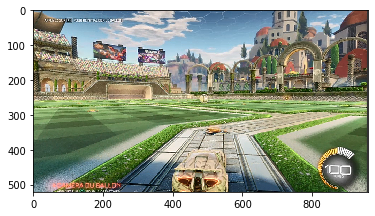

In [17]:
from grabscreen import grab_screen
screen = grab_screen(region=(0,40,960,560))
import matplotlib.pyplot as plt
plt.imshow(screen)

![controller](img/controller.png)

## Browse data

In [19]:
import cv2
import numpy as np

training_dataset = "training_data_2021-02-16-1"
data = np.load("training_data/"+training_dataset+"/training_data-1.npy",allow_pickle=True)

'''
Convert keys to a ...multi-hot... array
 0  1  2  3  4   5   6   7    8
[Z, S, Q, D, ZQ, ZD, C, V, NOKEY] boolean values.
A replaced by Q for french keyboard
'''
data[48][1]

[0, 0, 0, 0, 0, 0, 0, 0, 1]

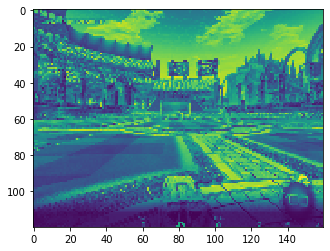

In [20]:
import matplotlib.pyplot as plt
plt.imshow(data[48][0])

In [21]:
import os

l = os.listdir("training_data/"+training_dataset)
# l[0]
len(l)

68

In [22]:
data = np.load("training_data/"+training_dataset+"/"+l[0],allow_pickle=True)
data[0][0]
# data[0][0].size

array([[184, 187, 184, ..., 152, 146, 126],
       [152, 191, 182, ..., 155, 150, 129],
       [ 56,  85, 121, ..., 158, 152, 130],
       ...,
       [ 92,  64,  81, ..., 174, 171, 143],
       [ 60,  86,  90, ..., 179,  73, 166],
       [ 58, 139, 107, ..., 191, 144,  61]], dtype=uint8)

In [23]:
data[0].size

2

## Balance data

In [42]:
import numpy as np
train_data = np.load("training_data/"+training_dataset+"/"+l[0],allow_pickle=True)
for file in l[1:]:
    load_data = np.load("training_data/"+training_dataset+"/"+file,allow_pickle=True)
    train_data = np.concatenate((train_data,load_data))

print ("Train Data: ", train_data.shape)

Train Data:  (34000, 2)


In [43]:
train_data[0][1]

[0, 0, 0, 0, 0, 0, 0, 0, 1]

In [44]:
# z = [1,0,0,0,0,0,0,0,0]
# s = [0,1,0,0,0,0,0,0,0]
# q = [0,0,1,0,0,0,0,0,0]
# d = [0,0,0,1,0,0,0,0,0]
# zq = [0,0,0,0,1,0,0,0,0]
# zd = [0,0,0,0,0,1,0,0,0]
# sq = [0,0,0,0,0,0,1,0,0]
# sd = [0,0,0,0,0,0,0,1,0]
# nk = [0,0,0,0,0,0,0,0,1]

In [45]:
z = []
s = []
q = []
d = []

for data in train_data:
    img = data[0]
    choice = data[1]

    if choice == [1,0,0,0,0,0,0,0,0]:
        z.append([img,choice])
    elif choice == [0,1,0,0,0,0,0,0,0]:
        s.append([img,choice])
    elif choice == [0,0,1,0,0,0,0,0,0]:
        q.append([img,choice])
    elif choice == [0,0,0,1,0,0,0,0,0]:
        d.append([img,choice])

In [46]:
len(z),len(s),len(q),len(d)

(6904, 796, 3620, 2752)

In [47]:
zq = []
zd = []
c = []
v = []
nk = []

for data in train_data:
    img = data[0]
    choice = data[1]

    if choice == [0,0,0,0,1,0,0,0,0]:
        zq.append([img,choice])
    elif choice == [0,0,0,0,0,1,0,0,0]:
        zd.append([img,choice])
    elif choice == [0,0,0,0,0,0,1,0,0]:
        c.append([img,choice])
    elif choice == [0,0,0,0,0,0,0,1,0]:
        v.append([img,choice])
    elif choice == [0,0,0,0,0,0,0,0,1]:
        nk.append([img,choice])

In [48]:
len(zq),len(zd),len(c),len(v),len(nk)

(5299, 5549, 6146, 1134, 1800)

In [49]:
z1 = z[:len(q)]

In [50]:
z2 = z[:len(q)][:len(d)]

In [51]:
z3 = z[:len(q)][:len(d)][:len(zq)][:len(zd)]

In [52]:
len(z1),len(z2),len(z3)

(3620, 2752, 2752)

In [53]:
# equilize everything
z = z[:len(q)][:len(d)][:len(zq)][:len(zd)]
# s ignored for training
q = q[:len(z)]
d = d[:len(z)]
zq = zq[:len(z)]
zd = zd[:len(z)]
c = c[:len(z)]
v = v[:len(z)]
nk = nk[:len(z)]

In [54]:
final_data = z + q + d + s + zq + zd + c + v + nk
len(final_data)

20242

In [55]:
# Execute balance_data.py
balanced_data = np.load("training_data/"+training_dataset+"-balanced.npy",allow_pickle=True)

In [56]:
# 1280*6 == no breaking (s,sq,sd)
balanced_data.shape

(18489, 2)

In [57]:
z = []
s = []
q = []
d = []
zq = []
zd = []
c = []
v = []
nk = []

for data in balanced_data:
    img = data[0]
    choice = data[1]

    if choice == [1,0,0,0,0,0,0,0,0]:
        z.append([img,choice])
    elif choice == [0,1,0,0,0,0,0,0,0]:
        s.append([img,choice])
    elif choice == [0,0,1,0,0,0,0,0,0]:
        q.append([img,choice])
    elif choice == [0,0,0,1,0,0,0,0,0]:
        d.append([img,choice])
    if choice == [0,0,0,0,1,0,0,0,0]:
        zq.append([img,choice])
    elif choice == [0,0,0,0,0,1,0,0,0]:
        zd.append([img,choice])
    elif choice == [0,0,0,0,0,0,1,0,0]:
        c.append([img,choice])
    elif choice == [0,0,0,0,0,0,0,1,0]:
        v.append([img,choice])
    elif choice == [0,0,0,0,0,0,0,0,1]:
        nk.append([img,choice])

len(z),len(q),len(d),len(s),len(zq),len(zd),len(c),len(v),len(nk)

(2386, 2386, 2386, 1093, 2386, 2386, 2386, 1057, 2023)

## Test model

In [1]:
import numpy as np
from grabscreen import grab_screen
import cv2
import time
from directkeys import PressKey,ReleaseKey, Z, Q, S, D
from alexnet import alexnet
from getkeys import key_check
import random

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
WIDTH = 160
HEIGHT = 120
LR = 1e-3
EPOCHS = 10
MODEL_NAME = 'model/rocket-{}-{}-{}-epochs-300K-data.model'.format(LR, 'alexnetv2',EPOCHS)

model = alexnet(WIDTH, HEIGHT, LR)
model.load(MODEL_NAME)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
INFO:tensorflow:Restoring parameters from d:\devel\rocket\model\rocket-0.001-alexnetv2-10-epochs-300K-data.model


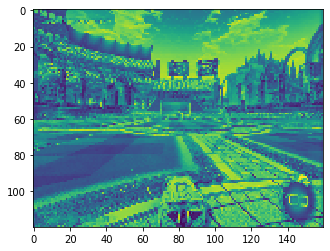

In [4]:
import matplotlib.pyplot as plt
screen = grab_screen(region=(0,40,960,560))
screen = cv2.cvtColor(screen, cv2.COLOR_BGR2GRAY)
screen = cv2.resize(screen, (160,120))
plt.imshow(screen)

In [5]:
prediction = model.predict([screen.reshape(160,120,1)])[0]
print(prediction)

[1.33571878e-01 5.68417076e-04 4.14134376e-02 5.36180615e-01
 1.19262256e-01 1.52357712e-01 5.18667803e-04 1.47146449e-04
 1.59799363e-02]


In [ ]:
'''
Convert keys to a ...multi-hot... array
0  1  2  3  4   5   6   7    8
[Z, S, Q, D, ZQ, ZD, SQ, SD, NOKEY] boolean values.
A replaced by Q for french keyboard
'''

In [15]:

turn_thresh = .75
fwd_thresh = 0.70

if prediction[0] > fwd_thresh:
    # straight()
    print("straight")
elif prediction[2]> turn_thresh or prediction[4] > turn_thresh:
    # left()
    print("left")
elif prediction[3]> turn_thresh or prediction[5]> turn_thresh:
    # right()
    print("right")
elif prediction[8]> fwd_thresh:
    print("NOKEY")
else:
    # straight()
    print("stop")
max_value = np.argmax(prediction)
max_value

stop


3

In [8]:
screen = grab_screen(region=(0,40,960,560))
screen = cv2.cvtColor(screen, cv2.COLOR_BGR2GRAY)
screen = cv2.resize(screen, (160,120))
prediction = model.predict([screen.reshape(160,120,1)])[0]
print(prediction)

[3.5297421e-03 6.2191364e-05 7.3506111e-05 3.0006928e-02 1.9473579e-03
 2.8795417e-02 1.3009844e-04 8.0079655e-05 9.3537474e-01]
